# Solmaz Seyed Monir

# Guanyu Li

# Problem Formulation/Introduction [5 points]
At the beginning of your notebook, you are required to write an introduction of the problem, which will motivate the readers.

1. You need to carefully read the description of your chosen Kaggle competition and formulate the data problem you are going to solve similar to what we have discussed in class. Points will be deducted if the problem is not correctly describing the corresponding Kaggle problem or the problem formulation is not clear to understand even judge the previous point. [3 points]

2. According to the problem, what's the data population? [2 points]

Titanic (Classification)
The sinking of the Titanic is one of the most infamous shipwrecks in history. On April 15, 1912, the widely considered “unsinkable” Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone on board, resulting in the death of 1502 out of 2224 passengers and crew.
Goal: Build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data like age, gender, class. How to deal with the data, how to analyze data through different plots and graphs, how to do data preprocessing, and finally how to predict things. we need to predict whether the other 418 passengers on board survived.
Data population: 891 passengers of the Titanic shipwreck whose life status has been known, and 418 passengers that we don't know if they survived in the Titanic.

<br><span style="font-family: Arial; font-size:1.4em; background-color: gold;"><font color='red'>Comments
The data population is not the sample information but the whole data population related your prediction question, which is not limited to the available sample data.</font>

*`Here is the changes of answer! data population`* 

<font color='blue'>***Answer:Contains demographics and passenger information from 891 of the 2224 passengers and crew on board the Titanic.***</font>

# Kaggle account
1. If you don't have a Kaggle account, you need to register one. Please include your account name in your notebook, which will be the one showing on the Leaderboard, when you submit your result in stage-2. [1 point]

solmazsm 

GUGUGU

<span style="font-family: Arial; font-size:1.4em;"><font color='red'>Comments<br>
Later, you will need to team up on Kaggle to submit a team model in stage 2.</font>

<span style="font-family: Arial; font-size:1.4em;"><font color='red'>Comments<br>
Those types of each feature are also part of the structure property</font>

In [453]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import HTML, display



In [454]:
def set_background(color):    
    script = (
        "var cell = this.closest('.jp-CodeCell');"
        "var editor = cell.querySelector('.jp-Editor');"
        "editor.style.background='{}';"
        "this.parentNode.removeChild(this)"
    ).format(color)
    
    display(HTML('<img src onerror="{}" style="display:none">'.format(script)))

2. After you download the data, you need to load them to your notebook, show several lines of each separate file and describe what is that data for. [5 points]

Each row represents the data of 1 passenger.
Columns represent the features. We have 10 features/ variables in this dataset.
Survival: This variable shows whether the person survived or not. This is our target variable & we have to predict its value. It’s a binary variable. 0 means not survived and 1 means survived.
pclass: The ticket class of passengers. 1st  (upper class), 2nd (middle), or 3rd (lower).
Sex: Gender of passenger
Age: Age (in years) of a passenger
sibsp: The no. of siblings/spouses of a particular passenger who were there on the ship.
parch: The no. of parents/children of a particular passenger who were there on the ship.
ticket: Ticket Number
fare: Passenger fare (like 1st class ticket fare must be greater than 2nd pr 3rd class ticket right)
cabin: Cabin Number
embarked: Port of Embarkation; From where that passenger took the ship. ( C = Cherbourg, Q = Queenstown, S = Southampton)
Clearly, it’s a classification problem because we need to tell whether the person will survive or not. We will use 5 different classifiers and compare their accuracy. The 5 different classifiers are as follows:

# 1. Show the data

In [455]:
titani_data_train=pd.read_csv('data/train.csv', delimiter=',')
titani_data_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [456]:
titani_data_train.shape

(891, 12)

There are 891 passengers and 11 attributes (PassengerId is just an index not an attribute of a passenger). The attributes are:

In [457]:
titani_data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [458]:
titani_data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# 1. Show the data (test data set)

In [459]:
titani_data_test=pd.read_csv('data/test.csv', delimiter=',')
titani_data_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [460]:
titani_data_test.shape

(418, 11)

In [461]:
titani_data_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [462]:
titani_data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


3.  Data Wrangling: this is an open component and you need to transform the data into a data frame or data frames for analysis or visualization. However, you need to include the discussion for each data properties (i.e., structure, granularity, scope, temporality, and faithfulness), using the data (e.g., visualizations or statistical summaries) as evidences. If one property cannot be identified using the data, you also need to show and tell that this is not available. [25 points, 5 for each property]

Ø Structure -- the “shape” of a data file Ø Granularity -- how fine/coarse is each datum Ø Scope -- how (in)complete is the data Ø Temporality -- how is the data situated in time Ø Faithfulness -- how well does the data capture “reality”


# 3.1 Structure: the “shape” of a data file
The train dataset and test dataset are all tabular data. For train dataset, we have 891 rows and 12 columns. For test dataset, we have 418 rows and 11 columns. The column names in test data and train data are same except that train data has “ground truth” for each passenger which is called "Survived" and test data doesn't.

In [463]:
print('Shape of train data', titani_data_train.shape)
print('Shape of test data', titani_data_test.shape)

Shape of train data (891, 12)
Shape of test data (418, 11)


# 3.2 Granularity: how fine/coarse is each datum Ø Scopetitani_data_train["Survived"].value_counts()
 We can further analyze the data by 'Pclass', 'Survived', or 'Sex'.

In [464]:
titani_data_train["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

 # 0 means not survived and 1 means survived

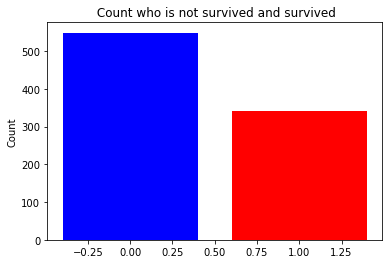

In [465]:
plt.bar(list(titani_data_train["Survived"].value_counts().keys()),list(titani_data_train["Survived"].value_counts()),color= ['b','r'])
plt.ylabel("Count")
plt.title(" Count who is not survived and survived")
plt.show()

Overall Survival Rates. Surival chances were low based on the graph. We might want to visualize how the survival rates varied by Sex, Age, Pclass. 

In [466]:
 titani_data_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

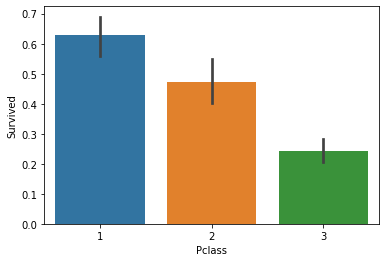

In [467]:
import seaborn as sns
sns.barplot(x='Pclass', y='Survived', data=titani_data_train)

In [468]:
titani_data_train[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


<AxesSubplot:xlabel='Sex', ylabel='Survived'>

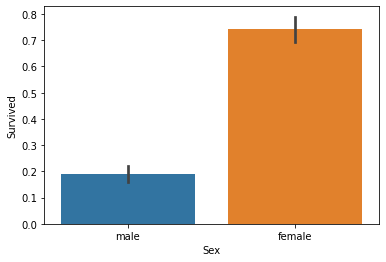

In [469]:
import seaborn as sns
sns.barplot(x='Sex', y='Survived', data=titani_data_train)

females had about 70% survival chance while males had about 30% survival chance.

Next, we investigate the survival rate by the passenger class.

In [470]:
train_pclass = titani_data_train.groupby('Pclass').size().reset_index(name='Num')
train_pclass['ticket_class'] = ['first', 'second', 'third']
train_pclass

,Pclass,Num,ticket_class
0,1,216,first
1,2,184,second
2,3,491,third


# 3.3 Scope: how (in)complete is the data
For the train data, the scope of age, fare, sibsp, and parch are 79.58, 512.33,
8, 6 respectively. For the test data, the scope of age, fare, sibsp, and parch are 75.83, 512.33, 8, 9 respectively.

<span style="font-family: Arial; font-size:1.4em; background-color: gold"><font color='red'>Comments<br>
for the scope, it is better to provide the value range instead of the difference between the max and min. The age distribution is a good one.
</font>

In [471]:
# scope analysis of train data
print('Scope of Age: ', titani_data_train['Age'].max() - titani_data_train['Age'].min())
print('Scope of Fare: ', titani_data_train['Fare'].max() - titani_data_train['Fare'].min())
print('Scope of SibSp: ',titani_data_train['SibSp'].max() - titani_data_train['SibSp'].min())
print('Scope of Parch: ', titani_data_train['Parch'].max() - titani_data_train['Parch'].min())

Scope of Age:  79.58
Scope of Fare:  512.3292
Scope of SibSp:  8
Scope of Parch:  6


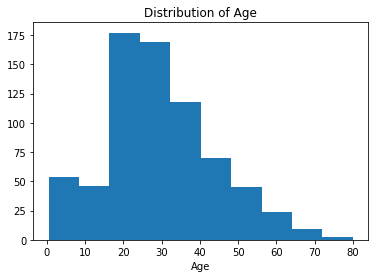

In [472]:
plt.hist(titani_data_train['Age'])
plt.title("Distribution of Age")
plt.xlabel('Age')
plt.show()

Children less than 15 years had higher survival chances. Passengers aged 20-40 were more likely to die. Passengers aged about 65 - 75 had an almost 0 survival chance. One passenger aged 80 years survived.

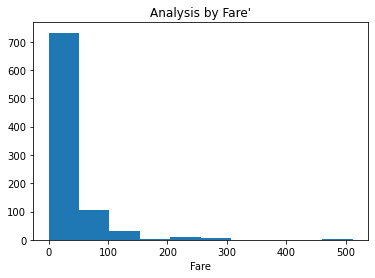

In [473]:
plt.hist(titani_data_train['Fare'])
plt.title("Analysis by Fare'")
plt.xlabel('Fare')
plt.show()

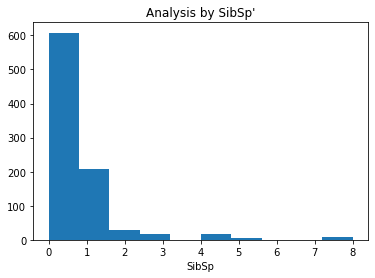

In [474]:
plt.hist(titani_data_train['SibSp'])
plt.title("Analysis by SibSp'")
plt.xlabel('SibSp')
plt.show()

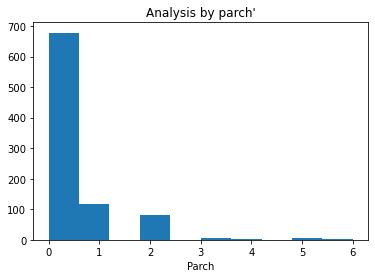

In [475]:
plt.hist(titani_data_train['Parch'])
plt.title("Analysis by parch'")
plt.xlabel('Parch')
plt.show()

In [476]:
print('Scope of Age: ', titani_data_test['Age'].max() - titani_data_test['Age'].min())
print('Scope of Fare: ', titani_data_test['Fare'].max() - titani_data_test['Fare'].min())
print('Scope of SibSp: ', titani_data_test['SibSp'].max() - titani_data_test['SibSp'].min())
print('Scope of Parch: ', titani_data_test['Parch'].max() - titani_data_test['Parch'].min())

Scope of Age:  75.83
Scope of Fare:  512.3292
Scope of SibSp:  8
Scope of Parch:  9


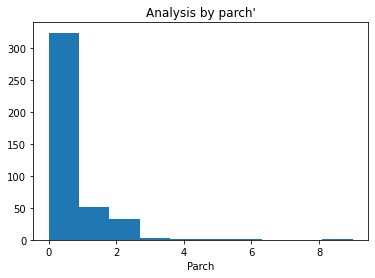

In [477]:
plt.hist(titani_data_test['Parch'])
plt.title("Analysis by parch'")
plt.xlabel('Parch')
plt.show()

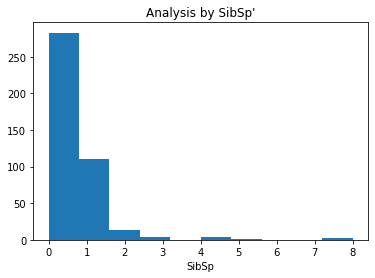

In [478]:
plt.hist(titani_data_test['SibSp'])
plt.title("Analysis by SibSp'")
plt.xlabel('SibSp')
plt.show()

Who has a SibSp less survived. 

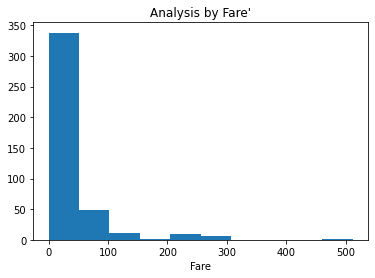

In [479]:
plt.hist(titani_data_test['Fare'])
plt.title("Analysis by Fare'")
plt.xlabel('Fare')
plt.show()

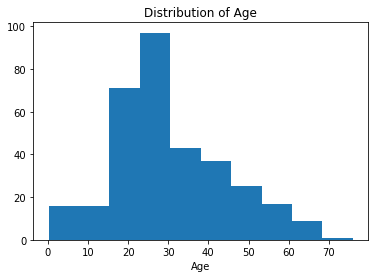

In [480]:
plt.hist(titani_data_test['Age'])
plt.title("Distribution of Age")
plt.xlabel('Age')
plt.show()

Children less than 15 years had higher survival chances. Passengers aged 20-40 were more likely to die. Passengers aged about 65 - 75 had an almost 0 survival chance. One passenger aged 80 years survived.

# 3.4 Temporality:  how is the data situated in time

Since all the data don't include any information related to time, I think this property cannot be identified in this problem.

# 3.5 Faithfulness:

<span style="font-family: Arial; font-size:1.4em; background-color: gold;"><font color='red'>Comments<br>
It is better to provide a conclusion of your evidence in terms of faithfulness. You will also need to check NaN values.</font>

*`Here is the changes of answer! faithfulness?`* 

<font color='blue'>***Answer:“faithful” if we believe it accurately captures reality. Combining the analysis of train data and test data, the scope of age is [0.42,80], the scope of fare is [0,512.33], the scope of sibsp is [0,8], and the scope of parch is [0,6]. It seems like reasonable and credible.***</font>

Combining the analysis of train data and test data

In [481]:
print('Range of Age: ', titani_data_train['Age'].min(), "-", titani_data_train['Age'].max())
print('Range of Fare: ', titani_data_train['Fare'].min(), "-",  titani_data_train['Fare'].max())
print('Range of SibSp: ', titani_data_train['SibSp'].min(), "-",  titani_data_train['SibSp'].max())
print('Range of Parch: ', titani_data_train['Parch'].min(), "-",  titani_data_train['Parch'].max())

Range of Age:  0.42 - 80.0
Range of Fare:  0.0 - 512.3292
Range of SibSp:  0 - 8
Range of Parch:  0 - 6


In [482]:
print('Range of Age: ', titani_data_test['Age'].min(), "-", titani_data_test['Age'].max())
print('Range of Fare: ', titani_data_test['Fare'].min(), "-",  titani_data_test['Fare'].max())
print('Range of SibSp: ', titani_data_test['SibSp'].min(), "-",  titani_data_test['SibSp'].max())
print('Range of Parch: ', titani_data_test['Parch'].min(), "-",  titani_data_test['Parch'].max())

Range of Age:  0.17 - 76.0
Range of Fare:  0.0 - 512.3292
Range of SibSp:  0 - 8
Range of Parch:  0 - 9


# 4. According to the data wrangling (maybe some visualizations), is the data obtained representative for the problem according to your data population? What kind of assumptions are needed that the analysis using the current data can solve the problem? [5 points]

scope of the age, SibSp, Parch is bigger enough and the data distribution is reasonable, such as Pclass and Sex. b. Assumptions: All the information in the data is real and correct.
Graphs are powerful visualization tools. In the titanic data, Age, Sex, Pclass and passenger class were important predictors of survival. Identifying such predictors is important for predictive modelling. we will investigate how different variables intercted with each other and with the survival rate.

# 5. Comparing the data population and the given data, guess what kind of sampling method maybe used during the data collection and why do you guess so. [2 points]

Using statitstics functions for data collection. 
Categorical: Survived, Sex, and Embarked. Ordinal: Pclass.


Total samples are 891 or 40% of the actual number of passengers on board the Titanic (2,224).

Ticket class. 1 stands for First class ticket. 2 stands for Second class ticket. 3 stands for Third class ticket.
data: Age, Sex who has siblin , Fare (How much money the passenger has paid for the travel) and Passenger class were important predictors of survival. Identifying such predictors is important for predictive modelling.

<span style="font-family: Arial; font-size:1.4em;background-color: gold;"><font color='red'>Comments<br>
More assumptions can be made, e.g., passengers not included in this sample are following similar pattern.<br>
Comments<br>
*Which statistics function? Why are you guessing so? No discussion.*<br>
Comments<br>
Better to emphasize the key points.</font>

*`Here is the changes of answer! statistics function?`* 

<font color='blue'>***Answer:
    stratified sampling was used during the data collection, since we have three classes in the train/test data: first, second and third class.***</font>

<hr>
<hr>
<hr>

#  ***Starting of stage-2*** 


`Here is Starting of stage-2!`

## 1.2 EDA and Data Transformation

This is an open question. The goal of this section is to prepare the data ready for modeling. First, the raw data you have may not be ready for even very simple EDA. 

Describe the transformations of the data you have applied if applicable. Why or Why not? [10 points]
Second, you probably have a certain number of features that you can use. You may choose to use all or some.

What are the features you choose to use for modeling? Why? Note: You may use EDA to show the reason. [5 points]
Finally, you will have the data ready for prediction. 

Readiness of the data. [2 points] [HINT: for some models, the value range of your features can affect the model a lot. Data normalization may be needed, o.w., one feature with huge values may dominate the modeling effect]

In [483]:
titani_data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [484]:
#  train data before data transformation
titani_data_train.head(8)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S


<font color='blue'>**Answer: According to the above table, it requires a lot of change from alphabetic to numerical format. We can, for example, change a male to a 0 and a female to a 1. Some cells that contain missing values (NaN = not a number)
***</font>

<font color='blue'>1. Sibsp	# of siblings / spouses aboard the Titanic*</font>    
<font color='blue'>2. *Parch	# of parents / children aboard the Titanic*</font>    

**SibSp and Parch would make more sense as a combined data, that shows the total number of relativescolumn**

# Look at the missing data

In [485]:
total = titani_data_train.isnull().sum().sort_values(ascending=False)
percent1 = titani_data_train.isnull().sum()/titani_data_train.isnull().count()*100
percent2 = (round(percent1, 1)).sort_values(ascending=False)
missingData = pd.concat([total, percent2], axis=1, keys=['Total', '%'])
missingData.head(12)

,Total,%
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2
PassengerId,0,0.0
Survived,0,0.0
Pclass,0,0.0
Name,0,0.0
Sex,0,0.0
SibSp,0,0.0
Parch,0,0.0


<font color='blue'>* ‘Age’ feature, which has 177 missing values 

<font color='blue'>* "Cabin" 77% of it is missing----->drop Because we have a lot of missing data! 
</font>

## Convert ‘Sex’ data into numeric

In [486]:
titani_data_train.values

array([[1, 0, 3, ..., 7.25, nan, 'S'],
       [2, 1, 1, ..., 71.2833, 'C85', 'C'],
       [3, 1, 3, ..., 7.925, nan, 'S'],
       ...,
       [889, 0, 3, ..., 23.45, nan, 'S'],
       [890, 1, 1, ..., 30.0, 'C148', 'C'],
       [891, 0, 3, ..., 7.75, nan, 'Q']], dtype=object)

In [487]:
# change data in the sex column as a male to a 0 and as a female to a 1
# Create a new dataframe 
# fill up missing data of age by ramdom value generated by normal distribution in train data
# Age column which has 177 missing values
transformdata = titani_data_train.replace({"Sex": {"male":0,"female":1}})
transformdata["Age"].fillna(np.random.normal(titani_data_train["Age"].mean(), titani_data_train["Age"].std()), inplace =True)
#Sibsp	# of siblings / spouses aboard the Titanic   
#Parch	# of parents / children aboard the Titanic
#SibSp and Parch would make more sense as a combined data, that shows the total number of relativescolumn
transformdata['CombRel'] = titani_data_train['SibSp'] + titani_data_train['Parch']
transformdata.drop(['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin', 'Embarked'], axis=1,inplace=True)

# creata a new column `dataset` by combining all the normalized data into a list
transformdata['dataset'] = transformdata.apply(
    lambda x: list([x['Pclass'], x['Sex'], x['Age'], x['Fare'], x['CombRel']]), axis=1)
transformdata.head(8)

,Survived,Pclass,Sex,Age,Fare,CombRel,dataset
0,0,3,0,22.000000,7.2500,1,"[3.0, 0.0, 22.0, 7.25, 1.0]"
1,1,1,1,38.000000,71.2833,1,"[1.0, 1.0, 38.0, 71.2833, 1.0]"
2,1,3,1,26.000000,7.9250,0,"[3.0, 1.0, 26.0, 7.925, 0.0]"
3,1,1,1,35.000000,53.1000,1,"[1.0, 1.0, 35.0, 53.1, 1.0]"
4,0,3,0,35.000000,8.0500,0,"[3.0, 0.0, 35.0, 8.05, 0.0]"
5,0,3,0,34.355921,8.4583,0,"[3.0, 0.0, 34.35592126136736, 8.4583, 0.0]"
6,0,1,0,54.000000,51.8625,0,"[1.0, 0.0, 54.0, 51.8625, 0.0]"
7,0,3,0,2.000000,21.0750,4,"[3.0, 0.0, 2.0, 21.075, 4.0]"


In [488]:
transformdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    float64
 4   Fare      891 non-null    float64
 5   CombRel   891 non-null    int64  
 6   dataset   891 non-null    object 
dtypes: float64(2), int64(4), object(1)
memory usage: 48.9+ KB


***Removed the missing cells in the 'Age' column and avoce information shows the prove about that***

In [489]:
data = [titani_data_train, titani_data_test]
for transformdata in data:
    transformdata['CombRel'] = dataset['SibSp'] + dataset['Parch']
    transformdata.loc[dataset['Relative'] > 0, 'Withrelative'] = 0
    transformdata.loc[dataset['Relative'] == 0, 'Withrelative'] = 1
    transformdata['Withrelative'] = dataset['Withrelative'].astype(int)
titani_data_train['Withrelative'].value_counts()

1    537
0    354
Name: Withrelative, dtype: int64

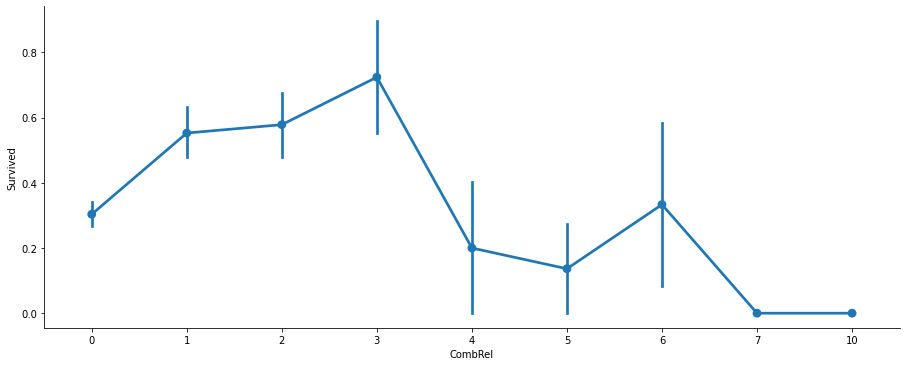

In [490]:
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)
import seaborn as sns
axes = sns.catplot(x='CombRel',y='Survived', data=titani_data_train, kind='point',aspect = 2.5)

**The plot show that there is a high probabilty of survival when passengers have with 1 to 3 realitvesa nd a lower probability when there is one or more than 3 (except for some cases with 6 relatives).**

# 1.3 Modeling

`Here is Starting of Modeling!`

* **Describe the chosen model and why choose this one. [3 points]**
* **Describe how the chosen features in 1.2 are involved in the chosen model (e.g., weighted linear combination of features in a linear model). [2 points]**
* **Describe the loss function that will be used to estimate the model's parameters (HINT: MSE? MAE? or others? if you are using an existing lib, you may need to check its document or google to figure out ). [2 points]**
* **Use a specific way (different ways have been discussed in A3) to estimate the model's parameters (e.g., sklearn's fit). [2 points]**
* **Use the model estimated to conduct a submission to the Kaggle competition and screenshot your leaderboard position. [3 points]**

<font color='blue'>* **Choosing Pclass, Sex, Age, Fare, and new column name is CombRel. There are five columns, we droped Cabin because it has " 77% of it is missing" Because Age is important younger survied more than older and Gender is important because female survied more than male, Pclass is important because od populantions are different and lower fare is greater than of higher fare. These five coulumns will have a ......Even if PassengerId, Name, and Ticket don't have any missing values either, they don't have much meaning.**</font>

# 1.4 Inference

# 1.5 Conclusions and Learnings

In this section, you can summarize your project and conclude your findings based on what you have done for the whole project. Additionally, please state what you have learned from this project in this course.

* **A convincing conclusion about the findings. [2 points]**
* **What you have learned from this project. [2 points]**